In [1]:
import numpy as np
import pysindy as ps
from pysindy.feature_library import PolynomialLibrary, FourierLibrary, CustomLibrary
import matplotlib.pyplot as plt

from generate_data import generate_tracking_data, generate_discrete_tracking_data
from decimal import Decimal

In [2]:
T = 1e-1
t = np.linspace(0, 20, 201)

x0 = [-0.1, 0.2, -0.1]
x0_val = [0.1, 0.1, 0]

u = lambda t: 0.001*np.sin(t)
u_val = lambda t: 0.001*np.cos(2*t)

x, x_dot = generate_tracking_data(t=t, x0=x0, u=u)
x_val, _ = generate_tracking_data(t=t, x0=x0_val, u=u_val)

xk = generate_discrete_tracking_data(t=t, x0=x0, T=T, u=u(t))
xk_val = generate_discrete_tracking_data(t=t, x0=x0_val, T=T, u=u_val(t))

In [15]:
model = ps.SINDy(
    feature_library=PolynomialLibrary(degree=3), # 2, 1
    # feature_library=FourierLibrary(n_frequencies=1), # 2, 1
    optimizer=ps.STLSQ(threshold=1e-9), # 0.001, 0.01, 0.1
    feature_names=[f'x{i+1}' for i in range(3)]+['u'],
    # discrete_time=True
    )
model.fit(x=x, x_dot=x_dot, u=u(t))
# model.fit(x=xk, u=u(t))
model.print(precision=4)

(x1)' = -0.8772 x1 + 0.9999 x3 + -0.2168 u + 0.4686 x1^2 + 0.0018 x1 x2 + -0.0882 x1 x3 + -0.0144 x1 u + -0.0191 x2^2 + 0.0006 x2 x3 + 0.0130 x2 u + 0.0001 x3^2 + 0.0014 x3 u + -0.0233 u^2 + 3.8440 x1^3 + 0.0050 x1^2 x2 + -0.9999 x1^2 x3 + 0.2571 x1^2 u + -0.0032 x1 x2^2 + 0.0008 x1 x2 x3 + 0.0526 x1 x2 u + 0.0003 x1 x3^2 + 0.0063 x1 x3 u + 0.3513 x1 u^2 + 0.0001 x2^3 + -0.0011 x2^2 x3 + -0.0237 x2^2 u + -0.0005 x2 x3^2 + -0.0052 x2 x3 u + 0.0846 x2 u^2 + -0.0001 x3^3 + 0.0017 x3^2 u + -0.0183 x3 u^2
(x2)' = 1.0000 x3
(x3)' = -4.2080 x1 + -0.3960 x3 + -20.9670 u + -0.4700 x1^2 + -3.5640 x1^3 + 6.2650 x1^2 u + 46.0000 x1 u^2 + 61.1000 u^3


In [11]:
x0s = np.random.uniform(-0.1, 0.1, (500, 3))

xss = []
x_dots = []
us = []

for x0 in x0s:
    u_test = lambda t: x0[0] / 100. * np.sin(t)
    x = generate_discrete_tracking_data(t=t, x0=x0, T=T, u=u_test(t))
    xss.append(x)
    x_dots.append(x_dot)
    us.append(u_test(t))

In [12]:
# for x_num in range(len(x0)):
#     q = 'Biblioteka funkcji & Próg & $\Dot{x}'
#     print(f'{q}_{x_num+1}$ & $E_{x_num+1}$ \\\\')
#     for i, library in enumerate([FourierLibrary(n_frequencies=2), FourierLibrary(n_frequencies=1), PolynomialLibrary(degree=3), PolynomialLibrary(degree=2), PolynomialLibrary(degree=1)]):
#         print(f'\\hline')
#         for threshold in range(3):
#             threshold = 10**(threshold-10) if i >= 2 else 100*10**(threshold-10)
#             # threshold = T * threshold
#             name = ['Trygonometryczna (st. 2)', 'Trygonometryczna (st. 1)', 'Wielomiany (st. 3)', 'Wielomiany (st. 2)', 'Liniowa']
#             model = ps.SINDy(
#                 feature_library=library,
#                 optimizer=ps.STLSQ(threshold=threshold),
#                 feature_names=[f'x{i+1}' for i in range(len(x0))]+['u'],
#                 # discrete_time=True
#                 )
#             # model.fit(x=xk, u=u(t))
#             model.fit(x=x, x_dot=x_dot, u=u(t))
#             try:
#                 x_sim = model.simulate(x0=x0_val, t=t, u=u_val)
#                 # x_sim = model.simulate(x0=x0_val, t=201, u=u_val(t))
#                 mse = ((x_sim - x_val)**2).mean(axis=0)
#                 E = '%.3E' % Decimal(str(mse[x_num]))
#             except:
#                 E = '\infty'
#             coeffs = ' + '.join(['%.3E' % Decimal(str(coeff))+' '+model.get_feature_names()[i] for i, coeff in enumerate(model.coefficients()[x_num]) if abs(model.coefficients()[x_num][i]) > threshold])
#             if len(coeffs.split(' + ')) > 2:
#                 eq = (coeffs.split(' + ')[0] + ' + ' + coeffs.split(' + ')[1] + '\dots').replace(' 1 +', ' +')
#             else:
#                 eq = coeffs
#             if len(coeffs) == 0:
#                 eq = '0,000'
#             eq = eq.replace(' 1 +', ' +').replace('.', ',').replace('+ -', '- ').replace('sin', '\sin').replace('cos', '\cos').replace('(1 x1)', '(x_1)').replace('(1 x2)', '(x_2)').replace('x2', 'x_2').replace('(1 x3)', '(x_3)').replace('x3', 'x_3').replace('x1', 'x_1').replace('(1 u)', '(u)')
#             thr = '%.0E' % Decimal(str(threshold))
#             for pow in range(1, 10):
#                 eq = eq.replace('E+00', '')
#                 E = E.replace('E+00', '')
#                 eq = eq.replace(f'E+0{pow}', f'\cdot 10^{pow}').replace(f'E-0{pow}', '\cdot 10^{'+f'{-pow}'+'}')
#                 E = E.replace(f'E+0{pow}', f'\cdot 10^{pow}').replace(f'E-0{pow}', '\cdot 10^{'+f'{-pow}'+'}')
#                 thr = thr.replace(f'1E+0{pow}', f'10^{pow}').replace(f'1E-0{pow}', '10^{'+f'{-pow}'+'}')
#             print(f"{name[i]} & ${thr}$ & ${eq}$ & ${E.replace('.', ',')}$ \\\\")
#     print('\n\n')

In [ ]:
x_sim = model.simulate(x0=x0_val, t=201, u=u_val(t))
mse = ((x_sim - x_val)**2).mean(axis=0)
print(f'Błąd średniokwadratowy x1: {mse[0]}, x2: {mse[1]}, x3: {mse[2]}')

Błąd średniokwadratowy x1: 1.9979519609556965e-10, x2: 1.8604127508462622e-10, x3: 7.256124957101251e-10


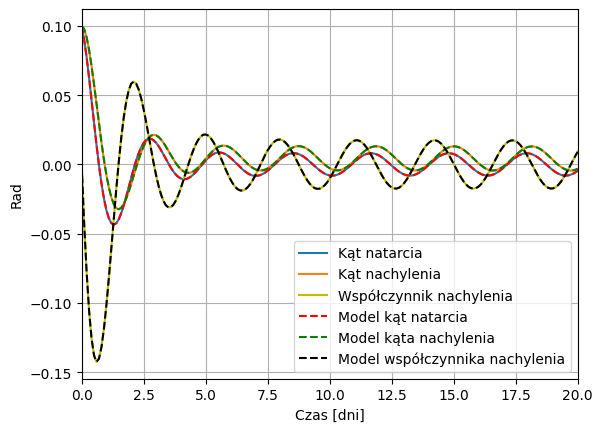

In [12]:
plt.plot(t, x_val[:, 0])
plt.plot(t, x_val[:, 1])
plt.plot(t, x_val[:, 2], 'y')
plt.plot(t, x_sim[:, 0], 'r--')
plt.plot(t, x_sim[:, 1], 'g--')
plt.plot(t, x_sim[:, 2], 'k--')
plt.ylabel("Rad")
plt.grid()
plt.legend(["Kąt natarcia", "Kąt nachylenia", "Współczynnik nachylenia", "Model kąt natarcia", "Model kąta nachylenia", "Model współczynnika nachylenia"])
plt.xlim(0, max(t))
plt.xlabel("Czas [dni]")
plt.show()